**STEP 1**

Before doing anything, we need to bring in the Python libraries that help us work with data, build the model, and evaluate the results.

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np




1.   pandas and numpy are for handling data in table and array formats.
2.   sklearn provides the dataset, regression model, and evaluation metrics.








**STEP 2**

I used the built-in California Housing dataset from scikit-learn

In [2]:
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='MedHouseValue')


1.   X contains all the input features (like income, house age, rooms, etc.)
2.   y is the target variable – the median value of a house in $100,000s.



In [5]:
# prints the first 5 rows/values

print("Feature Data (X):")
print(X.head())

print("\nTarget Values (y):")
print(y.head())

Feature Data (X):
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  

Target Values (y):
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseValue, dtype: float64


**STEP 3**

To evaluate how well our model performs, we need to split the data.

**Tutor Notes** : Typically, we train the model on 80% of the data and test it on the remaining 20%.


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


random_state=42 just ensures that the results are reproducible.

**STEP 4**

Now comes the fun part — training the model! Linear regression tries to draw a straight line through the data that best fits the housing prices.

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


**STEP 5**

After training, we use the model to predict prices for the 20% of the data it hasn't seen before.

In [9]:
y_pred = model.predict(X_test)


**STEP 6**

We now check how well our model did.

R2 Score tells us how much of the variation in house prices our model can explain (1 is perfect).

Mean Squared Error (MSE) – measures how far off the predictions are from actual values. Lower is better.

In [10]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score:", r2)
print("Mean Squared Error:", mse)


R2 Score: 0.5757877060324508
Mean Squared Error: 0.5558915986952444


**BONUS**

Adding some plots to showoff

Loading the arsenal

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns


***PLOT 1*** :
**Distribution of the Target Variable**

To check for skewness or outliers in the variable we're predicting.

If the distribution is skewed, a transformation like log(y) might improve model performance.



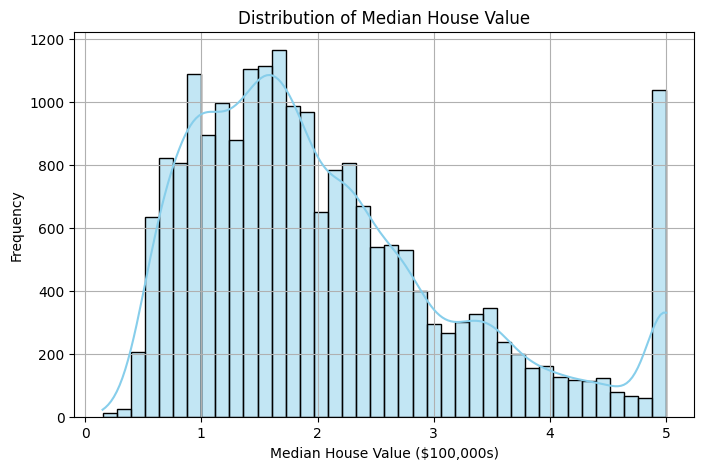

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(y, bins=40, kde=True, color='skyblue')
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value ($100,000s)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


 ***PLOT 2*** : **Scatter Plot: Median Income vs MedHouseValue**

Median income is one of the strongest predictors of house value in this dataset.

We’ll likely see a positive correlation here, possibly with a cap (i.e., max price ceiling), showing linear trends with diminishing returns.

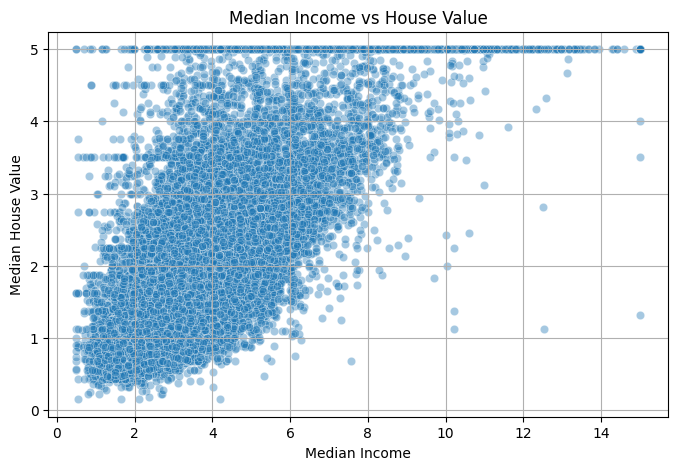

In [14]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X['MedInc'], y=y, alpha=0.4)
plt.title("Median Income vs House Value")
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.grid(True)
plt.show()


***PLOT 3*** : **Actual vs Predicted Values**

Check how close your predictions are to the actual values.

 Points closer to the red line means better predictions.

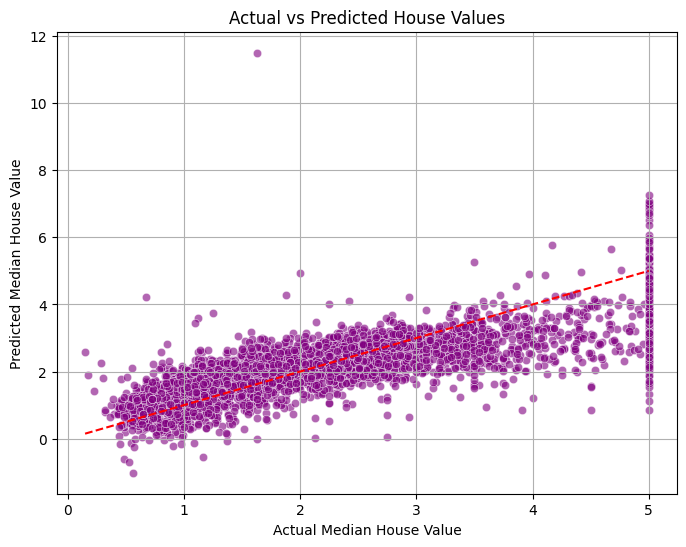

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='purple')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted House Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.grid(True)
plt.show()
